# MNIST Dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  1 cost:  2.66913017696
Epoch:  2 cost:  1.06242883558
Epoch:  3 cost:  0.85842505138
Epoch:  4 cost:  0.757274531858
Epoch:  5 cost:  0.692832424966
Epoch:  6 cost:  0.645898517316
Epoch:  7 cost:  0.610390820855
Epoch:  8 cost:  0.581262760921
Epoch:  9 cost:  0.55715509137
Epoch:  10 cost:  0.536898221211
Epoch:  11 cost:  0.519345188574
Epoch:  12 cost:  0.503771284141
Epoch:  13 cost:  0.490810674646
Epoch:  14 cost:  0.478029303293
Epoch:  15 cost:  0.467176529806
Accuracy:  0.8866
Label:  [9]
Prediction:  [9]


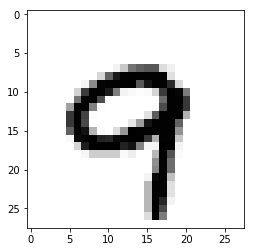

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# MNIST Dataset 가져오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# shape = 28 * 28
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# hypothesis - sosftmax
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
# cost - ghkrdls
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# measure
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) # 에측값이 참이면 True, 아니면 False
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# batch로 작업
training_epochs = 15 # 전체 데이터 셋을 모두 한번씩 학습시키는 것을 1epoch이라고 한다
batch_size = 100 # 한번에 읽어등일 사이즈

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost= 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c/total_batch
        print('Epoch: ', epoch+1, 'cost: ', avg_cost)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # image
    r = random.randint(0, mnist.test.num_examples -1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r: r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()